In [3]:
import pandas as pd
df=messages = pd.read_csv('SMSSpamCollection.csv', sep='\t',
                           names=["label", "message"])
df.head()


,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
# Display shape of the dataset

df.shape


(5572, 2)

In [62]:
### Exploratory Data Analysis

In [63]:
# Get some basic statistics about the data

print(df.describe())

       label                 message
count   5572                    5572
unique     2                    5169
top      ham  Sorry, I'll call later
freq    4825                      30


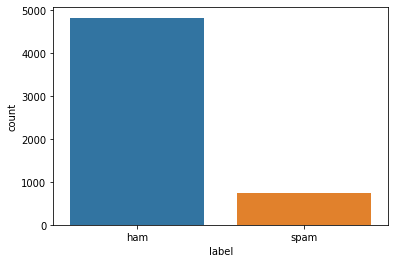

In [69]:
# Bar chart of a categorical- Labels column


sns.countplot(x='label', data=df)
plt.show()

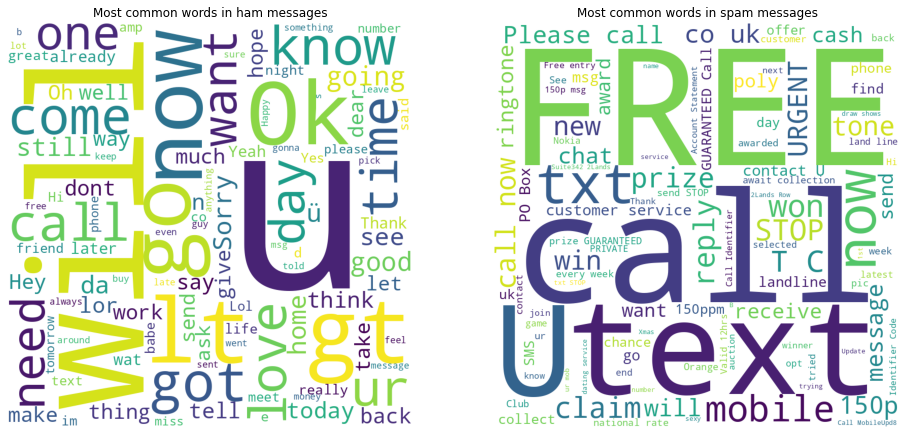

In [73]:
# Word Cloud for Ham and Spam Messages

import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Get the texts and labels of the messages
texts = df['message']
labels = df['label']

# Create a WordCloud for the ham messages
ham_texts = ' '.join(texts[labels == 'ham'])
ham_wordcloud = WordCloud(width=800, height=800, background_color='white', max_words=100, contour_width=3, contour_color='steelblue')
ham_wordcloud.generate(ham_texts)

# Create a WordCloud for the spam messages
spam_texts = ' '.join(texts[labels == 'spam'])
spam_wordcloud = WordCloud(width=800, height=800, background_color='white', max_words=100, contour_width=3, contour_color='steelblue')
spam_wordcloud.generate(spam_texts)

# Plot the WordClouds
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,8))
ax1.imshow(ham_wordcloud)
ax1.set_title('Most common words in ham messages')
ax1.axis('off')
ax2.imshow(spam_wordcloud)
ax2.set_title('Most common words in spam messages')
ax2.axis('off')
plt.show()


In [74]:
# check for null values in the DataFrame
null_values = df.isnull().sum()

# print the number of null values in each column
print(null_values)

label      0
message    0
dtype: int64


In [76]:
# Check Duplicates

num_duplicates = df['message'].duplicated().sum()

print(f'There are {num_duplicates} duplicate values in the "message" column.')

There are 403 duplicate values in the "message" column.


In [77]:
# drop the duplicate rows from the DataFrame
df = df.drop_duplicates()

In [5]:
# Defining X as list of messages

X=list(df['message'])


In [6]:
# Defining y as list of Labels

y=list(df['label'])


In [8]:
# Spliting the data into train and test

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)


In [10]:
# Installing the transformers

!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 93.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.8/199.8 KB 23.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 105.7 MB/s eta 0:00:00


In [11]:
# Initiating the Distil Bert Transformer

from transformers import DistilBertTokenizerFast
tokenizer = DistilBertTokenizerFast.from_pretrained('distilbert-base-uncased')


In [12]:
# Encoding

train_encodings = tokenizer(X_train, truncation=True, padding=True)
test_encodings = tokenizer(X_test, truncation=True, padding=True)


In [13]:
y_train

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [14]:
# Train and test encoding

import tensorflow as tf

train_dataset = tf.data.Dataset.from_tensor_slices((
    dict(train_encodings),
    y_train
))

test_dataset = tf.data.Dataset.from_tensor_slices((
    dict(test_encodings),
    y_test
))


In [15]:
from transformers import TFDistilBertForSequenceClassification, TFTrainer, TFTrainingArguments

training_args = TFTrainingArguments(
    output_dir='./results',          # output directory
    num_train_epochs=2,              # total number of training epochs
    per_device_train_batch_size=8,  # batch size per device during training
    per_device_eval_batch_size=16,   # batch size for evaluation
    warmup_steps=500,                # number of warmup steps for learning rate scheduler
    weight_decay=0.01,               # strength of weight decay
    logging_dir='./logs',            # directory for storing logs
    logging_steps=10,
)


In [18]:
training_args.eval_steps = 1000


In [19]:
# Training the model

with training_args.strategy.scope():
    model = TFDistilBertForSequenceClassification.from_pretrained("distilbert-base-uncased")

trainer = TFTrainer(
    model=model,                         
    args=training_args,                  
    train_dataset=train_dataset,         
    eval_dataset=test_dataset             
)
trainer.train()


Some layers from the model checkpoint at distilbert-base-uncased were not used when initializing TFDistilBertForSequenceClassification: ['activation_13', 'vocab_projector', 'vocab_transform', 'vocab_layer_norm']
- This IS expected if you are initializing TFDistilBertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some layers of TFDistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier', 'pre_classifier', 'dropout_59']
You should probably TRAIN this model on a down-stream task to be able to use i

In [20]:
# Evaluating the model and displaying the loss

trainer.evaluate(test_dataset)


{'eval_loss': 0.018746093341282435}

In [21]:
# Predicting of test dataset

trainer.predict(test_dataset)


PredictionOutput(predictions=array([[ 3.3932543, -3.4873984],
       [-3.0734708,  3.1657937],
       [ 3.05996  , -3.1013386],
       ...,
       [ 2.5973182, -2.5592844],
       [-3.1432867,  3.2404442],
       [ 2.7996593, -2.8710399]], dtype=float32), label_ids=array([0, 1, 0, ..., 0, 1, 0], dtype=int32), metrics={'eval_loss': 0.018751624652317594})

In [22]:
trainer.predict(test_dataset)[1].shape


(1115,)

In [23]:
output=trainer.predict(test_dataset)[1]


In [24]:
# Confusion matrix for test dataset, which shows that 0 false positive and false negative 

from sklearn.metrics import confusion_matrix

cm=confusion_matrix(y_test,output)
cm


array([[955,   0],
       [  0, 160]])

In [25]:
# Saving the trained model for future predictions

trainer.save_model('senti_model')


In [35]:
# Retriving the model to use and predict the text

from transformers import TFBertForSequenceClassification, BertTokenizer

# Load the saved model
model_path = '/content/senti_model' # Replace with the path to your saved model
model = TFBertForSequenceClassification.from_pretrained(model_path)


You are using a model of type distilbert to instantiate a model of type bert. This is not supported for all configurations of models and can yield errors.
Some layers from the model checkpoint at /content/senti_model were not used when initializing TFBertForSequenceClassification: ['distilbert', 'pre_classifier', 'dropout_59']
- This IS expected if you are initializing TFBertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some layers of TFBertForSequenceClassification were not initialized from the model checkpoint at /content/senti_model and are newly initialized: ['bert']
You should probably 

In [55]:
# Load the tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Prepare input text
input_text = ['Congratulations! You have been selected to receive a free cruise to the Bahamas. Call now to claim your prize.']
input_ids = tokenizer(input_text, padding=True, truncation=True, return_tensors='tf')



In [56]:
# Extract input_ids tensor from the BatchEncoding object
input_ids = input_ids['input_ids']

# Make predictions
predictions = model.predict(input_ids)

# Print the predictions
print(predictions)


1/1 [==============================] - 3s 3s/step
TFSequenceClassifierOutput(loss=None, logits=array([[-0.06926338, -0.23738296]], dtype=float32), hidden_states=None, attentions=None)


In [57]:
# Tokenize the input sequence

encoded_input = tokenizer.encode_plus(
    input_text, 
    add_special_tokens=True, 
    return_attention_mask=True, 
    return_tensors='tf'
)

# Make the prediction
outputs = model(encoded_input['input_ids'], attention_mask=encoded_input['attention_mask'])
logits = outputs[0]


In [60]:
predicted_class = "spam" if logits[0][0] > logits[0][1] else "ham"


In [61]:
#The prediction on the text shows it as a spam message
predicted_class

'spam'

Conclusion / Summary

Overall, the project provides a good understanding and implementation of the Transformers library in TensorFlow for text classification tasks. Some of the key learnings from this project include:

*   The importance of data preparation and pre-processing for text classification tasks

*   The benefits of using a pretrained model and fine-tuning it for a specific task

*   The various parameters and arguments that can be used for training and fine-tuning the model

*   How to evaluate the performance of the model using metrics such as loss and confusion matrix

*   How to use the Transformers library and its associated classes and methods to perform text classification tasks in TensorFlow.

In conclusion, this project provides a valuable resource for learning and build text classification models using the Transformers library in TensorFlow. It covers the key steps involved in the process and provides a good starting point for further experimentation and exploration.














Problem & Challenges

While working on the project we faces quite intense challenges and problems which we tried to solve and because of which we also had to change our dataset.Some of the major challenges are listed below:

*   Using the GPU. First we tried to use the GPU in our machine by installing CUDA and required drivers, but it didn't work. And as we were working of SST dataset, the tuning if model was taking even on google colab GPU, so we had to drop the idea as we had waste significant amount of time on it and as the deadline was approachig we switched to Ham and Spam dataset. We had a good learning experience with both the dataset, and we intent to continue working on the SST dataset.
*   Dealing with the SST dataset. To convert text file to csv was a bit of a challenge.
*   Understanding the Tranformers concept and getting the appropriate data to work on. 






References:

To understand and implement the transformers concept we had to take help from Class notes, Youtube Videos, Blogs and ChatGPT.